In [22]:
# Install mglearn if not already installed
!pip install mglearn

#library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import mglearn

In [2]:
# 1. Load dataset
# Membaca file CSV yang berisi data
file_path = '/content/CitarumWater.csv'
df = pd.read_csv(file_path)

In [3]:
# Memeriksa apakah terdapat nilai yang hilang
print("Jumlah nilai yang hilang:")
print(df.isnull().sum())


Jumlah nilai yang hilang:
No               0
NamaSungai       0
TitikPantau      0
Waktu            0
pH               0
Temp             0
TSS              0
DO               0
BOD              0
COD              0
Nitrat           0
FecalColiform    0
Fosfat           0
O2               0
IP               0
Class            0
dtype: int64


In [5]:
# Mengisi nilai yang hilang dengan median untuk kolom numerik saja
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].median(), inplace=True)

<ipython-input-5-f8000e096c9c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


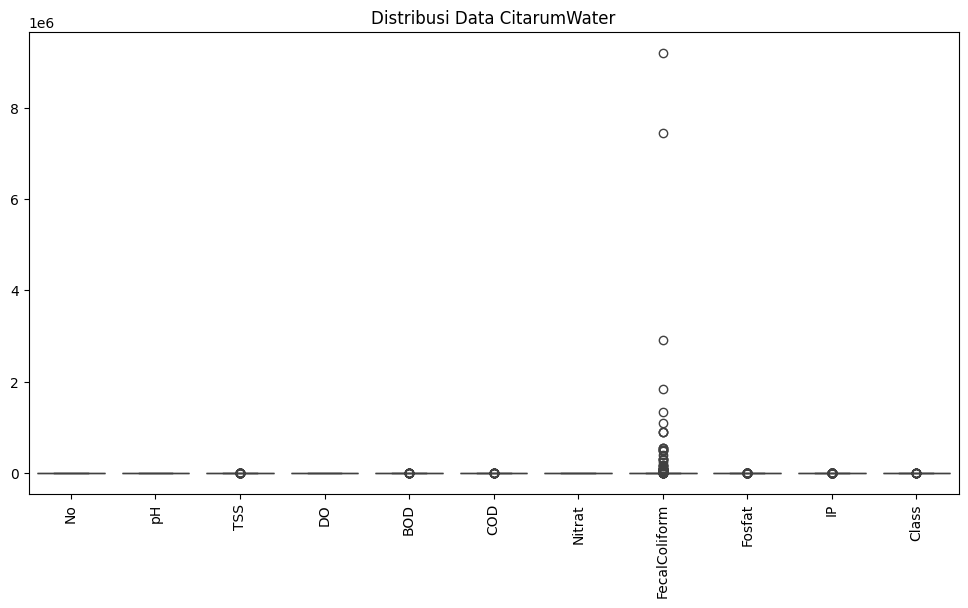

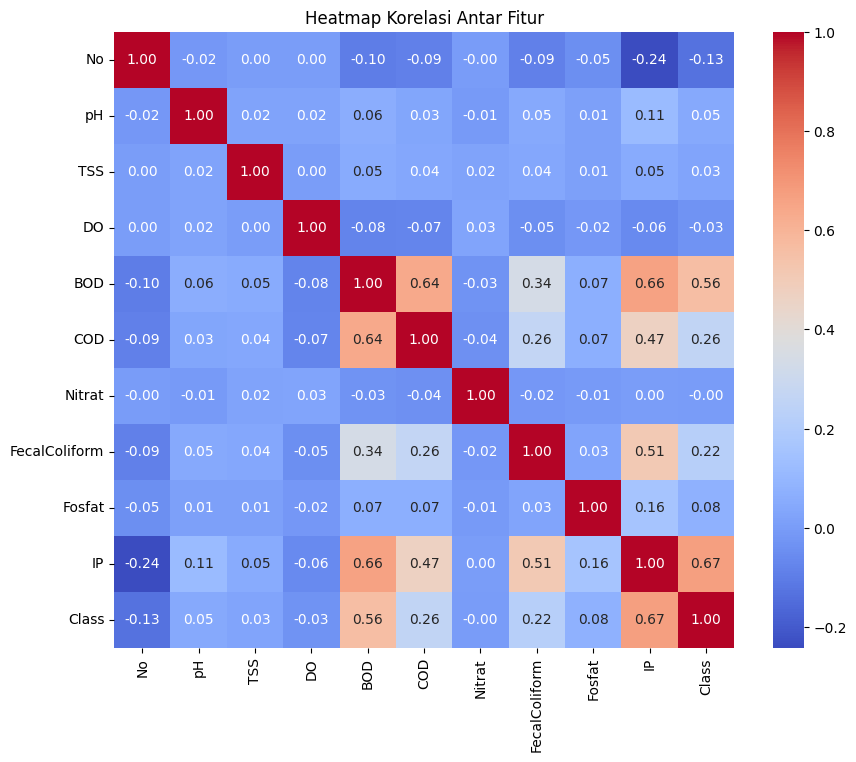

In [8]:
# Visualisasi distribusi data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number)) # Only include numeric columns for boxplot
plt.xticks(rotation=90)
plt.title("Distribusi Data CitarumWater")
plt.show()

# Visualisasi korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f') # Only include numeric columns for correlation
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [9]:
# Memilih fitur dan target (asumsi target adalah kolom terakhir)
X = df.iloc[:, :-1]  # Semua kecuali kolom terakhir
y = df.iloc[:, -1]    # Kolom terakhir sebagai target

In [10]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Memilih fitur dan target (asumsi target adalah kolom terakhir)
X = df.iloc[:, :-1]  # Semua kecuali kolom terakhir
y = df.iloc[:, -1]    # Kolom terakhir sebagai target
# %%
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# %%
# Memilih fitur dan target (asumsi target adalah kolom terakhir)
# Exclude 'NamaSungai' column
X = df.drop(columns=['NamaSungai'])  # Exclude the 'NamaSungai' column

y = df.iloc[:, -1]    # Kolom terakhir sebagai target

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_train contains only numerical features
X_train = X_train.select_dtypes(include=np.number)
X_test = X_test.select_dtypes(include=np.number)

# Normalisasi dengan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Akurasi: 1.00
Presisi: 1.00
Recall: 1.00
F1-Score: 1.00
AUC: 1.00
Class Distribution in y_test:
Class
2    294
1    196
3      6
4      4
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


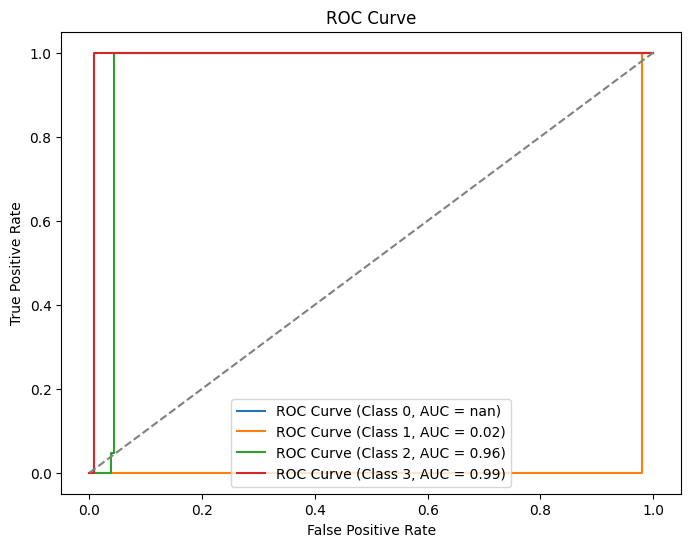

In [25]:
# Membuat model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Memprediksi hasil
y_pred = model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
# Specify 'average' parameter for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted') # Changed to 'weighted'
recall = recall_score(y_test, y_pred, average='weighted') # Changed to 'weighted'
f1 = f1_score(y_test, y_pred, average='weighted') # Changed to 'weighted'

# Get predicted probabilities for AUC calculation
y_probs = model.predict_proba(X_test_scaled)  # Get class probabilities
auc = roc_auc_score(y_test, y_probs, multi_class='ovr') # Changed for multiclass AUC calculation


print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

# Check and address class imbalance
print("Class Distribution in y_test:")
print(y_test.value_counts())

# Plot ROC Curve
# Get probabilities for all classes
y_probs = model.predict_proba(X_test_scaled)

# Assuming 'Status' is the name of your target column
# and it has values 0, 1, 2, 3 representing the classes
class_labels = [0, 1, 2, 3]  # Replace with your actual class labels

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, label in enumerate(class_labels):  # Loop through all classes
    fpr[i], tpr[i], _ = roc_curve(y_test, y_probs[:, i], pos_label=label)

    # Calculate AUC using roc_auc_score for more robust handling of NaNs
    roc_auc[i] = roc_auc_score(y_test == label, y_probs[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i, label in enumerate(class_labels):
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve (Class {label}, AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Penjelasan Matematika dalam Model Logistic Regression
1. Persamaan Logistic Regression
Logistic Regression digunakan untuk klasifikasi biner dan didasarkan pada model regresi linier yang kemudian dilewatkan ke fungsi sigmoid. Persamaan dasar regresi logistik adalah:

𝑃
(
𝑦
=
1
∣
𝑋
)
=
1
1
+
𝑒
−
(
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
.
.
.
+
𝛽
𝑛
𝑋
𝑛
)
P(y=1∣X)=
1+e
−(β
0
​
 +β
1
​
 X
1
​
 +β
2
​
 X
2
​
 +...+β
n
​
 X
n
​
 )

1
​

di mana:

𝑃
(
𝑦
=
1
∣
𝑋
)
P(y=1∣X) adalah probabilitas bahwa kelas target
𝑦
y bernilai 1, diberikan fitur
𝑋
X.
𝛽
0
β
0
​
  adalah intercept (bias).
𝛽
1
,
𝛽
2
,
.
.
.
,
𝛽
𝑛
β
1
​
 ,β
2
​
 ,...,β
n
​
  adalah koefisien regresi yang dipelajari oleh model.
𝑋
1
,
𝑋
2
,
.
.
.
,
𝑋
𝑛
X
1
​
 ,X
2
​
 ,...,X
n
​
  adalah fitur input.
𝑒
e adalah bilangan Euler (~2.718).
Fungsi sigmoid mengubah nilai linear menjadi rentang (0,1), sehingga cocok untuk prediksi probabilitas.

2. Evaluasi Model

Setelah model dilatih, kita mengevaluasinya menggunakan beberapa metrik:

a. Akurasi (Accuracy)
Mengukur proporsi prediksi yang benar terhadap total data:

𝐴
𝑐
𝑐
𝑢
𝑟
𝑎
𝑐
𝑦
=
𝑇
𝑃
+
𝑇
𝑁
𝑇
𝑃
+
𝑇
𝑁
+
𝐹
𝑃
+
𝐹
𝑁
Accuracy=
TP+TN+FP+FN
TP+TN
​

di mana:

TP (True Positive) = jumlah prediksi positif yang benar.
TN (True Negative) = jumlah prediksi negatif yang benar.
FP (False Positive) = jumlah prediksi positif yang salah.
FN (False Negative) = jumlah prediksi negatif yang salah.
b. Presisi (Precision)
Presisi mengukur seberapa akurat model dalam memprediksi kelas positif:

𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
Precision=
TP+FP
TP
​

Presisi tinggi menunjukkan bahwa model jarang memberikan prediksi positif yang salah.

c. Recall (Sensitivity atau True Positive Rate)
Recall mengukur seberapa baik model menangkap seluruh data positif:

𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
Recall=
TP+FN
TP
​

Recall tinggi berarti model tidak melewatkan banyak kasus positif.

d. F1-Score
F1-Score adalah rata-rata harmonik antara presisi dan recall, sehingga memberikan keseimbangan antara keduanya:

𝐹
1
=
2
×
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
×
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
+
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
F1=2×
Precision+Recall
Precision×Recall
​

F1-Score tinggi menunjukkan keseimbangan antara presisi dan recall.

e. AUC - ROC (Area Under Curve - Receiver Operating Characteristic)
ROC Curve menggambarkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR):

𝑇
𝑃
𝑅
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
TPR=
TP+FN
TP
​

𝐹
𝑃
𝑅
=
𝐹
𝑃
𝐹
𝑃
+
𝑇
𝑁
FPR=
FP+TN
FP
​

AUC adalah luas area di bawah kurva ROC. Nilai AUC mendekati 1 menunjukkan bahwa model memiliki performa yang baik dalam membedakan kelas positif dan negatif.